Dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv

## Importing data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
pd.set_option('display.max_column', None)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test = pd.read_csv('test.csv')
pd.set_option('display.max_column', None)
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
missing_data = train.isnull()

In [5]:
#Count missing values in each column of train
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Id
False    1460
Name: Id, dtype: int64

MSSubClass
False    1460
Name: MSSubClass, dtype: int64

MSZoning
False    1460
Name: MSZoning, dtype: int64

LotFrontage
False    1201
True      259
Name: LotFrontage, dtype: int64

LotArea
False    1460
Name: LotArea, dtype: int64

Street
False    1460
Name: Street, dtype: int64

Alley
True     1369
False      91
Name: Alley, dtype: int64

LotShape
False    1460
Name: LotShape, dtype: int64

LandContour
False    1460
Name: LandContour, dtype: int64

Utilities
False    1460
Name: Utilities, dtype: int64

LotConfig
False    1460
Name: LotConfig, dtype: int64

LandSlope
False    1460
Name: LandSlope, dtype: int64

Neighborhood
False    1460
Name: Neighborhood, dtype: int64

Condition1
False    1460
Name: Condition1, dtype: int64

Condition2
False    1460
Name: Condition2, dtype: int64

BldgType
False    1460
Name: BldgType, dtype: int64

HouseStyle
False    1460
Name: HouseStyle, dtype: int64

OverallQual
False    1460
Name: OverallQual, dtype: i

## Deleting Features

In [6]:
combined_sets = pd.concat([train, test], axis=0, sort=False)
combined_sets

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,

In [7]:
train.shape

(1460, 81)

In [8]:
test.shape

(1459, 80)

In [9]:
combined_sets = combined_sets.drop(['SalePrice', 'Id'], axis=1)
combined_sets.shape

(2919, 79)

In [10]:
def clean_features(data, weight_perc, missing_perc):
    
    for col in data.columns:

        nulls = data[col].isna().sum()
        uniques = data[col].nunique()
        values = data[col].value_counts()
        feature_len = len(data[col])
        highest = 0

        for value_count in values:
            if value_count > highest:
                highest = value_count
        
        value_weight = round(highest/feature_len, 4)
        missing_values = round(nulls/feature_len, 4)
        print(f'{col}: one value weight: {value_weight}, missing values: {missing_values} ')
        
        if value_weight > weight_perc or missing_values > missing_perc:
            data = data.drop([col], axis = 1)
        
    return data

In [11]:
combined_sets = clean_features (data = combined_sets, weight_perc = 0.8, missing_perc=0.4)

MSSubClass: one value weight: 0.3696, missing values: 0.0 
MSZoning: one value weight: 0.776, missing values: 0.0014 
LotFrontage: one value weight: 0.0946, missing values: 0.1665 
LotArea: one value weight: 0.0151, missing values: 0.0 
Street: one value weight: 0.9959, missing values: 0.0 
Alley: one value weight: 0.0411, missing values: 0.9322 
LotShape: one value weight: 0.6369, missing values: 0.0 
LandContour: one value weight: 0.8983, missing values: 0.0 
Utilities: one value weight: 0.999, missing values: 0.0007 
LotConfig: one value weight: 0.7307, missing values: 0.0 
LandSlope: one value weight: 0.9517, missing values: 0.0 
Neighborhood: one value weight: 0.1518, missing values: 0.0 
Condition1: one value weight: 0.8602, missing values: 0.0 
Condition2: one value weight: 0.9897, missing values: 0.0 
BldgType: one value weight: 0.8308, missing values: 0.0 
HouseStyle: one value weight: 0.5039, missing values: 0.0 
OverallQual: one value weight: 0.2826, missing values: 0.0 
Ove

In [12]:
combined_sets.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'MoSold', 'YrSold'],
      dtype='object')

## Numerical features 

In [13]:
train = train[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'MoSold', 'YrSold', 'SalePrice']]
train_numerical = train.select_dtypes(include = np.number)
train_numerical

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,150,856,856,854,1710,1,2,1,3,8,0,2003.0,2,548,0,61,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,284,1262,1262,0,1262,0,2,0,3,6,1,1976.0,2,460,298,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,434,920,920,866,1786,1,2,1,3,6,1,2001.0,2,608,0,42,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,540,756,961,756,1717,1,1,0,3,7,1,1998.0,3,642,0,35,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,490,1145,1145,1053,2198,1,2,1,4,9,1,2000.0,3,836,192,84,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,953,953,953,694,1647,0,2,1,3,7,1,1999.0,2,460,0,40,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,589,1542,2073,0,2073,1,2,0,3,7,2,1978.0,2,500,349,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,877,1152,1188,1152,2340,0,2,0,4,9,2,1941.0,1,252,0,60,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,0,1078,1078,0,1078,1,1,0,2,5,0,1950.0,1,240,366,0,4,2010,142125


There are a lot of different ways to select features. Here, we will be using

1.Heatmap
2.ExtraTreeClassifier
3.RFECV (rfe with cross-validation)

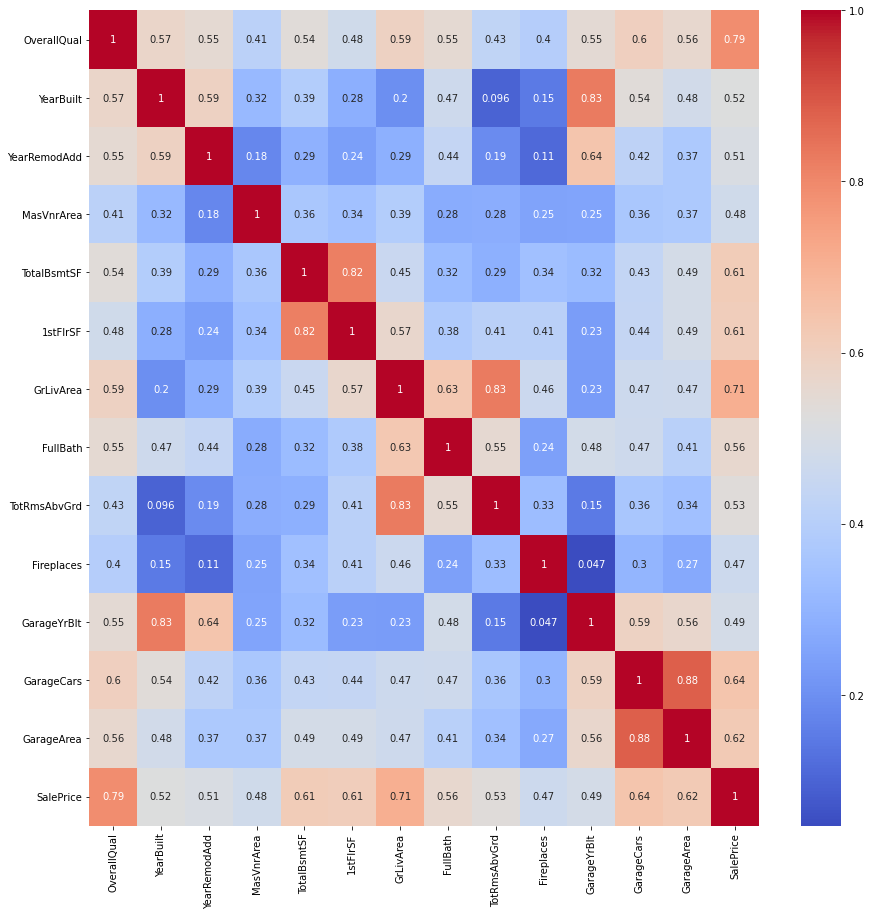

In [14]:
#1. Heatmap
#We will only look at the numerical values with a correlation above 40%

corr = train_numerical.corr()
corr_over = corr.index[abs(corr['SalePrice']>0.4)]
plt.figure(figsize=(15,15))
g = sns.heatmap(train_numerical[corr_over].corr(), annot=True, cmap = 'coolwarm')


GarageYrBlt and YearBilt, TotRmsAbvGrd and GrLivArea, GarageCars and GarageArea, are values that highly correlate. Thus, let's drop GarageYrBlt, TotRmsAbvGrd  as they correlate the least with SalePrice.

In [15]:
train_numerical_heatmap = train[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea','TotalBsmtSF', '1stFlrSF', 'GrLivArea',
                       'FullBath', 'Fireplaces', 'GarageCars', 'GarageArea']]

In [16]:
#2. ExtraTreeClassifier
#To use this we have to fill all the missing values.
train_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   LotArea       1460 non-null   int64  
 3   OverallQual   1460 non-null   int64  
 4   OverallCond   1460 non-null   int64  
 5   YearBuilt     1460 non-null   int64  
 6   YearRemodAdd  1460 non-null   int64  
 7   MasVnrArea    1452 non-null   float64
 8   BsmtFinSF1    1460 non-null   int64  
 9   BsmtUnfSF     1460 non-null   int64  
 10  TotalBsmtSF   1460 non-null   int64  
 11  1stFlrSF      1460 non-null   int64  
 12  2ndFlrSF      1460 non-null   int64  
 13  GrLivArea     1460 non-null   int64  
 14  BsmtFullBath  1460 non-null   int64  
 15  FullBath      1460 non-null   int64  
 16  HalfBath      1460 non-null   int64  
 17  BedroomAbvGr  1460 non-null   int64  
 18  TotRmsAbvGrd  1460 non-null 

In [17]:
#LotFrontage, MsVnrArea and GarageYrBlt have missing values.
train_numerical['LotFrontage'].isnull().sum()

259

In [18]:
train_numerical['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
112.0      1
138.0      1
149.0      1
38.0       1
111.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [19]:
#replace the nan values with mean
train_numerical['LotFrontage'].fillna(train_numerical['LotFrontage'].mean(), inplace=True)

c:\users\pc world\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [20]:
train_numerical['LotFrontage'].isnull().sum()

0

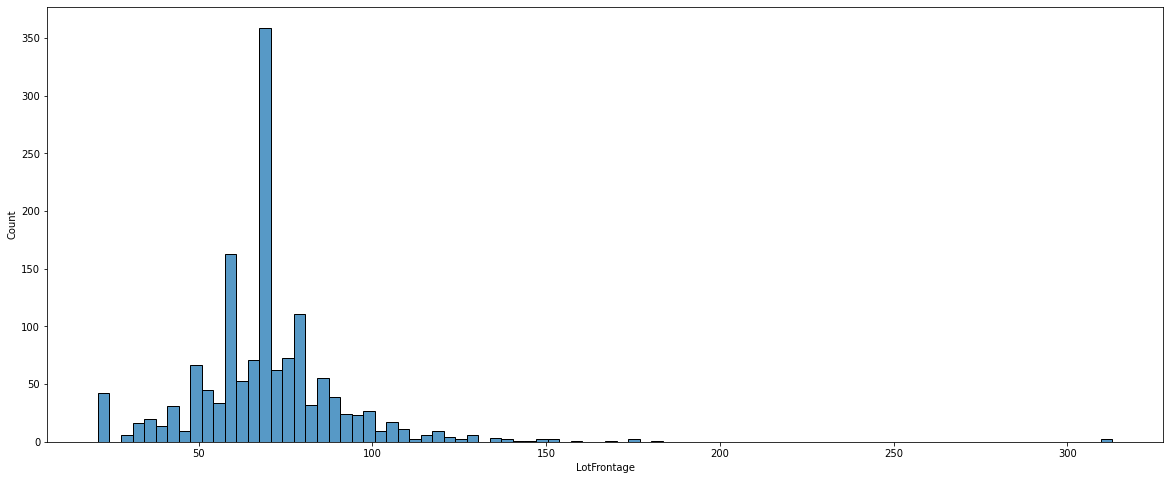

In [21]:
plt.figure(figsize= (20,8))
sns.histplot(train_numerical['LotFrontage'])
plt.show()

In [22]:
train_numerical['MasVnrArea'].isnull().sum()

8

In [23]:
train_numerical['MasVnrArea'].value_counts()

0.0      861
108.0      8
72.0       8
180.0      8
16.0       7
        ... 
31.0       1
366.0      1
528.0      1
894.0      1
415.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [24]:
train_numerical['MasVnrArea'].fillna(0, inplace=True)

c:\users\pc world\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [25]:
train_numerical['MasVnrArea'].isnull().sum()

0

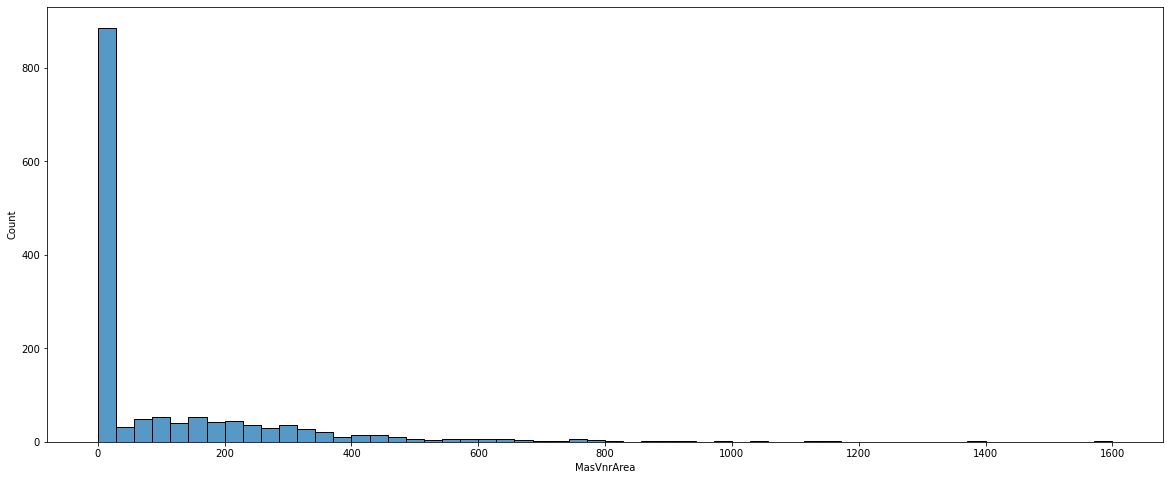

In [26]:
plt.figure(figsize=(20, 8))
sns.histplot(train_numerical['MasVnrArea'])
plt.show()

In [27]:
train_numerical['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1906.0     1
1908.0     1
1933.0     1
1900.0     1
1927.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [28]:
train_numerical['GarageYrBlt'].fillna(train_numerical['GarageYrBlt'].mean(), inplace=True)

c:\users\pc world\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [29]:
train_numerical['GarageYrBlt'].isnull().sum()

0

c:\users\pc world\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


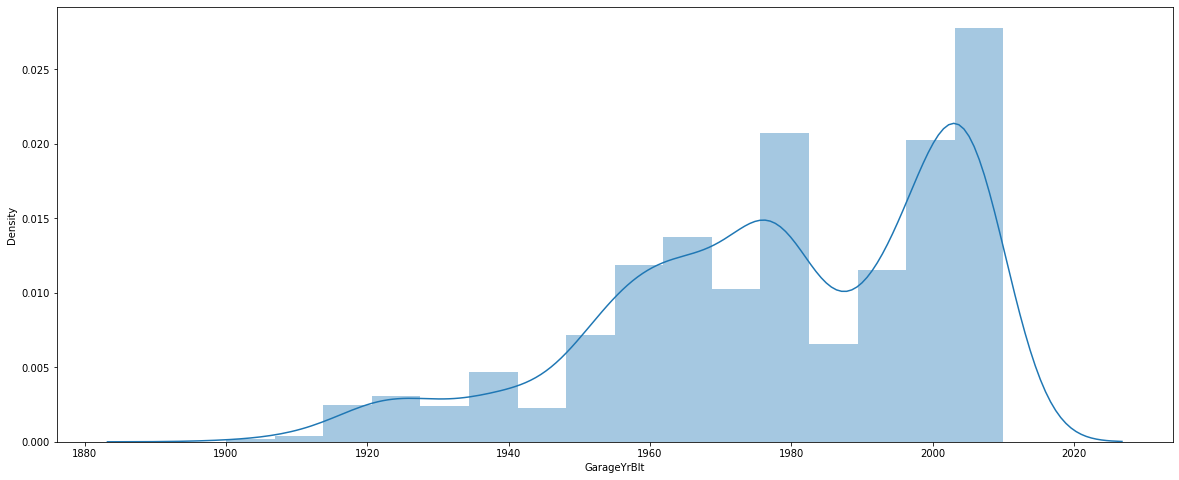

In [30]:
plt.figure(figsize=(20,8))
sns.distplot(train_numerical['GarageYrBlt'])
plt.show()

### extra-trees classifier
An extra-trees classifier. This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

[0.02700654 0.0480347  0.05028438 0.03545894 0.02959047 0.04640603
 0.04570869 0.03263541 0.04421717 0.04890425 0.04939532 0.04950522
 0.02699104 0.05035691 0.01988557 0.01407551 0.01388713 0.02585284
 0.03809848 0.02436619 0.04529235 0.01935101 0.04688133 0.03777562
 0.03762874 0.04914464 0.04326554]


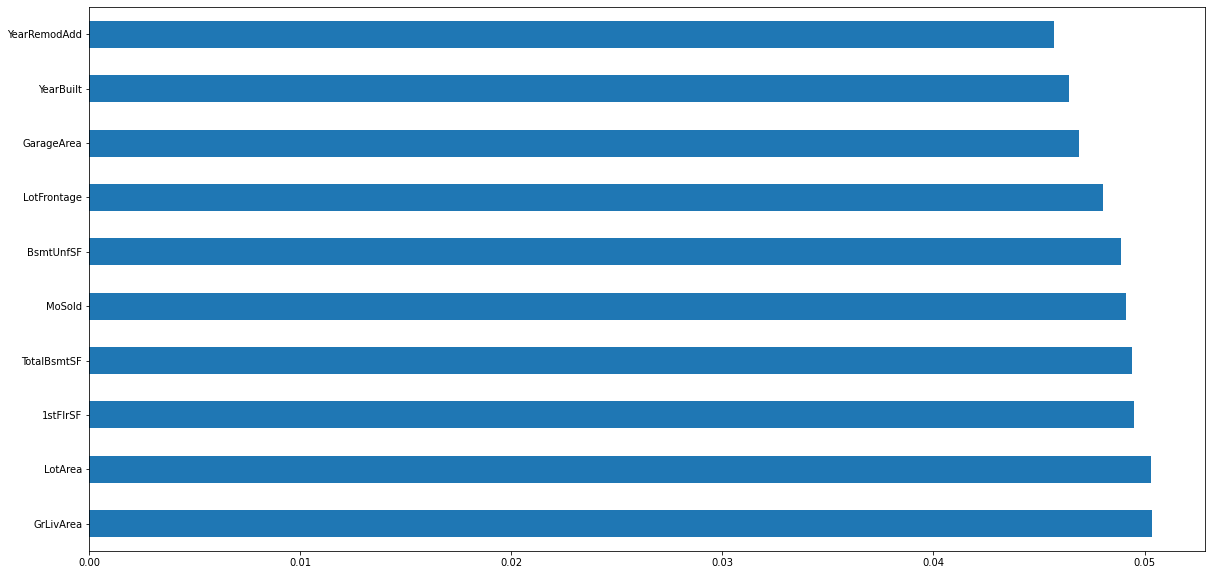

In [38]:
from sklearn.ensemble import ExtraTreesClassifier
y_train = train_numerical['SalePrice']
train_numerical_etc = train_numerical.drop(['SalePrice'], axis=1)
etc = ExtraTreesClassifier()
etc.fit(train_numerical_etc, y_train)
important_features = pd.Series(etc.feature_importances_, index = train_numerical_etc.columns)
print(etc.feature_importances_)
plt.figure(figsize = (20,10))
important_features.nlargest(10).plot(kind ='barh')
plt.show()

### RFECV with linear regression
Recursive Feature Elimination, Cross-Validated (RFECV) feature selection. Selects the best subset of features for the supplied estimator by removing 0 to N features (where N is the number of features) using recursive feature elimination, then selecting the best subset based on the cross-validation score of the model.

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV

train_numerical_rfecv = train_numerical.drop(['SalePrice'], axis = 1)

ols =LinearRegression()
rfecv = RFECV(estimator=ols, step=1, scoring="neg_mean_squared_error", cv=4, verbose=0, n_jobs=4)

rfecv.fit(train_numerical_rfecv, y_train)
rfecv.transform(train_numerical_rfecv)

print("Optimum number of features: %d" % rfecv.n_features_)
train_numerical_rfecv.columns[rfecv.support_]

Optimum number of features: 18


Index(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'WoodDeckSF', 'MoSold', 'YrSold'],
      dtype='object')

In [45]:
train_numerical = train_numerical_heatmap[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea','TotalBsmtSF', '1stFlrSF', 'GrLivArea',
                       'FullBath', 'Fireplaces', 'GarageCars', 'GarageArea']]

## Categorical Features 

In [46]:
train_categorical = train.select_dtypes(include = object)
train_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSZoning      1460 non-null   object
 1   LotShape      1460 non-null   object
 2   LotConfig     1460 non-null   object
 3   Neighborhood  1460 non-null   object
 4   HouseStyle    1460 non-null   object
 5   RoofStyle     1460 non-null   object
 6   Exterior1st   1460 non-null   object
 7   Exterior2nd   1460 non-null   object
 8   MasVnrType    1452 non-null   object
 9   ExterQual     1460 non-null   object
 10  Foundation    1460 non-null   object
 11  BsmtQual      1423 non-null   object
 12  BsmtExposure  1422 non-null   object
 13  BsmtFinType1  1423 non-null   object
 14  HeatingQC     1460 non-null   object
 15  KitchenQual   1460 non-null   object
 16  GarageType    1379 non-null   object
 17  GarageFinish  1379 non-null   object
dtypes: object(18)
memory usage: 205.4+ KB


In [48]:
for col in train_categorical.columns:
    train_categorical[col] = train_categorical[col].fillna('U')

c:\users\pc world\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [49]:
train_categorical.isnull().sum()

MSZoning        0
LotShape        0
LotConfig       0
Neighborhood    0
HouseStyle      0
RoofStyle       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
ExterQual       0
Foundation      0
BsmtQual        0
BsmtExposure    0
BsmtFinType1    0
HeatingQC       0
KitchenQual     0
GarageType      0
GarageFinish    0
dtype: int64

LotShape: Maybe we can turn it into a binary feature (Regular and irregular), find out.
Neighborhood: Seems nominal, given that the data tells us about the physical location, which seems to have no inherent order -> dummies.
HouseStyle: Seems too detailed compared to the information each value gives, maybe group (or delete). Nominal or ordinal, not quite sure yet.
Exterior1st and Exterior2nd: Exterior1st is the exterior covering the house, Exterior2nd the exterior covering the house, given that more than 1 material is used. Exterior2nd seems deprecative. Nominal -> dummies
MasVnrType: Masonry veneer type. Seems nominal. -> dummies
ExterQual: Definitly ordinal. Values ranging from poor to excellent. -> group
Foundation: Type of foundation. Seems nominal.-> dummies
BsmtQual: Heigh of the basement. Not sure if nominal or ordinal. find out?
BsmtExposure: Walkout/garden level walls exposure. Assume nominal -> dummies
BsmtFinType1: Rating of basement finished area. Ordinal -> group
HeatingQc: Heating quality and condition. Ordinal -> group
Kitchen Qual: Ordinal -> group.
FireplaceQu: Ordinal -> group
GarageType: Garage location. Nominal -> onehot
GarageFinish: Interior finish of the garage. Ordinal -> group

Now, let's find out if LotShape can be binary, if Exterior1st and Exterior2nd can be reduced to one feature, and what kind of data HouseStyle and BsmtQual are.

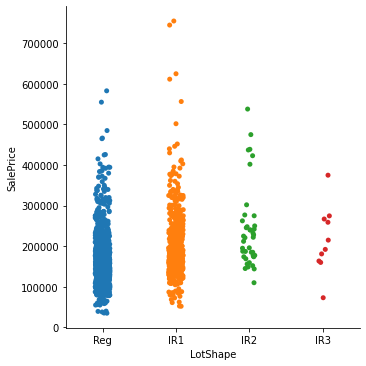

In [51]:
sns.catplot(x = 'LotShape', y = 'SalePrice', data = train)

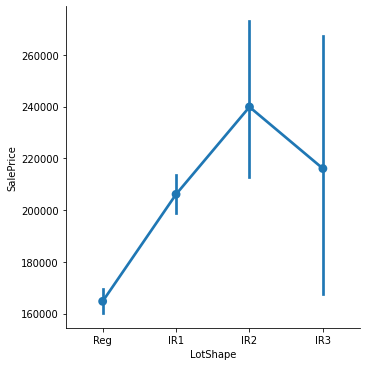

In [52]:
sns.catplot(x = 'LotShape', y = 'SalePrice', kind = 'point', data = train)

In [55]:
train_categorical['LotShape'].value_counts()

1    925
0    535
Name: LotShape, dtype: int64

In [53]:
#Let's make it binary, as there seem to be a signifcant difference between regular and irregular
train_categorical['LotShape'] = train_categorical['LotShape'].map(lambda x: 1 if (x == 'Reg') else 0)

c:\users\pc world\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


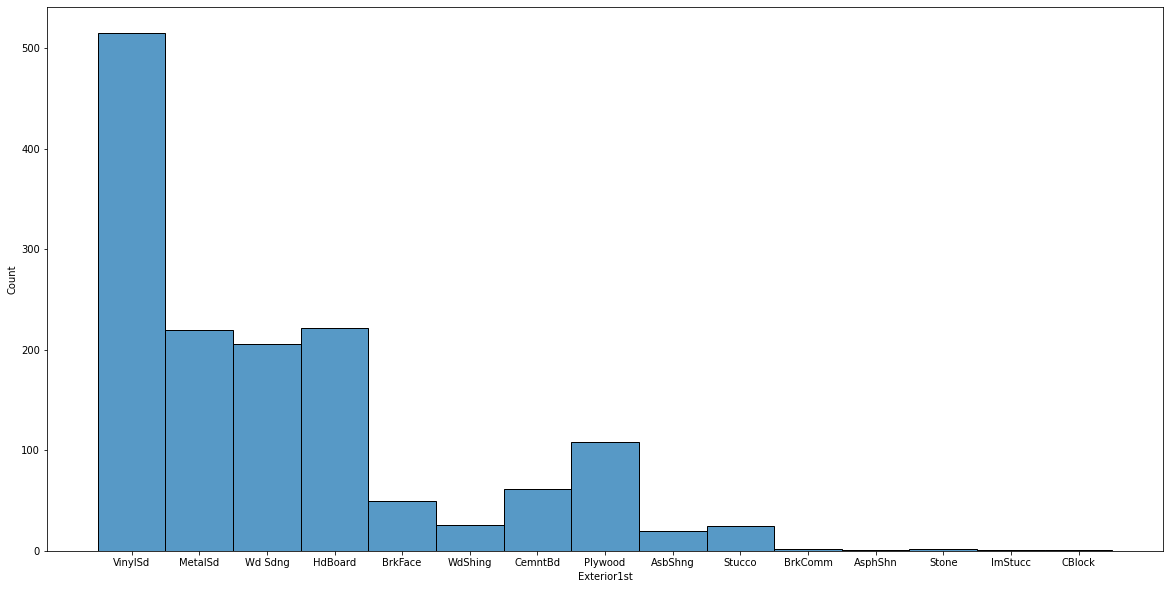

In [56]:
plt.figure(figsize= (20,10))
sns.histplot(train_categorical['Exterior1st'])
plt.show()

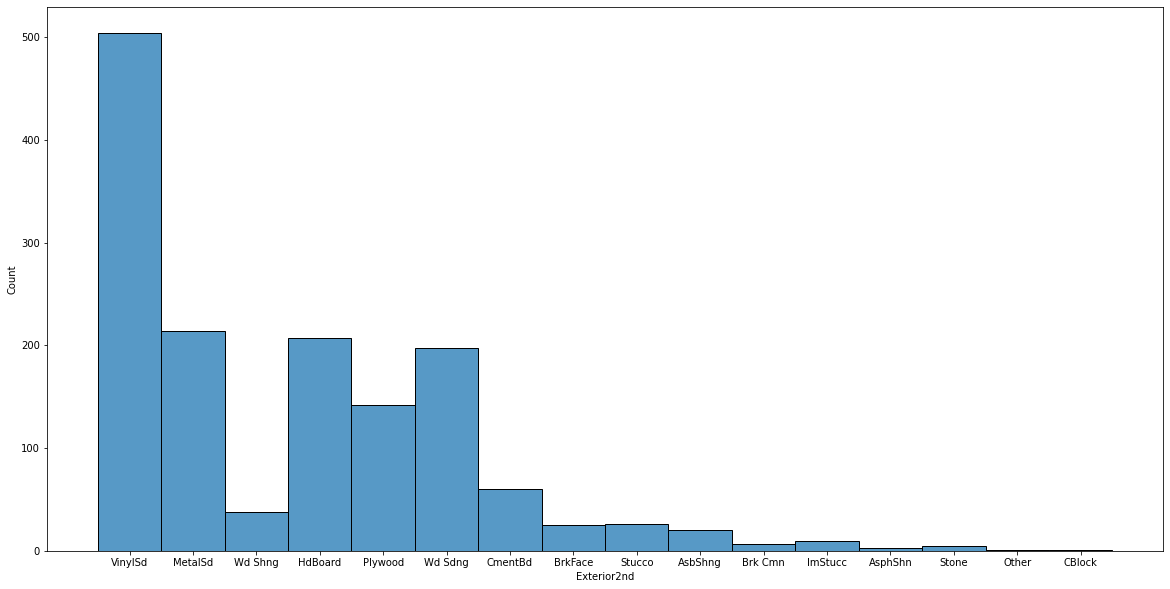

In [57]:
plt.figure(figsize= (20,10))
sns.histplot(train_categorical['Exterior2nd'])
plt.show()

In [58]:
#Seems similar enough, let's delete Exterior2nd
train_categorical = train_categorical.drop(['Exterior2nd'], axis = 1)

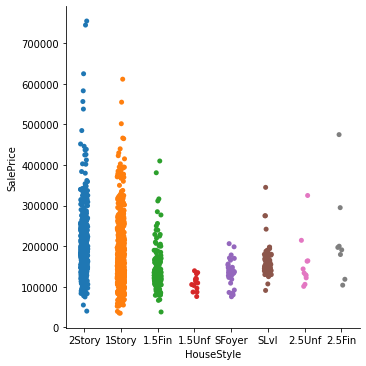

In [59]:
sns.catplot(x = 'HouseStyle', y = 'SalePrice', data = train)

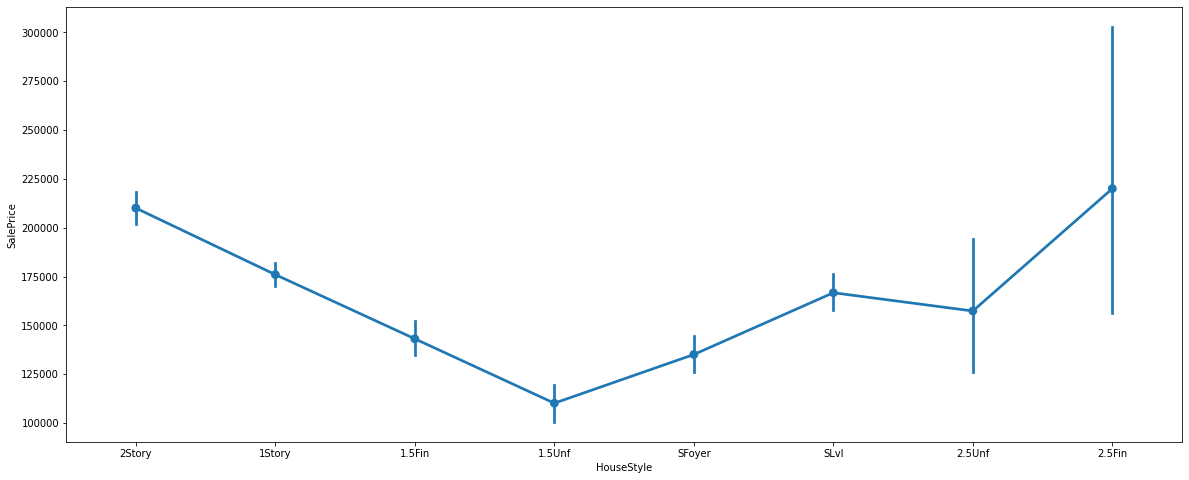

In [60]:
plt.figure(figsize= (20,8))
sns.pointplot(x = 'HouseStyle', y = 'SalePrice', data = train, )
plt.show()

In [61]:
#Housestyle does not seem that predicative of the sale price, even if grouped. Let's delete this feature.
train_categorical = train_categorical.drop(['HouseStyle'], axis = 1)

In [62]:
test_categorical = test[train_categorical.columns]
test_categorical['LotShape'] = test_categorical['LotShape'].map(lambda x: 1 if (x == 'Reg') else 0)
for col in test_categorical.columns:
     test_categorical[col] = test_categorical[col].fillna('U')

for col in train_categorical.columns:
    unique_train = train_categorical[col].unique()
    unique_test = test_categorical[col].unique()
    
    for value in unique_train:
        if value not in unique_test:
            print(f"train in col {col} has {value}, but test does not.")
   
    for value in unique_test:
        if value not in unique_train:
            print(f"test in col {col} has {value}, but train does not.")

test in col MSZoning has U, but train does not.
train in col Exterior1st has Stone, but test does not.
train in col Exterior1st has ImStucc, but test does not.
test in col Exterior1st has U, but train does not.
test in col KitchenQual has U, but train does not.


c:\users\pc world\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\pc world\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [63]:
test_categorical['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
U             4
Name: MSZoning, dtype: int64

In [64]:
train_categorical['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
CBlock       1
AsphShn      1
ImStucc      1
Name: Exterior1st, dtype: int64

In [65]:
test_categorical['Exterior1st'].value_counts()

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
U            1
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64

In [66]:
test_categorical['KitchenQual'].value_counts()

TA    757
Gd    565
Ex    105
Fa     31
U       1
Name: KitchenQual, dtype: int64

In [ ]:
# for grouping of categorical data we need to do this operation
test_categorical = test_categorical[test_categorical['MSZoning'] != 'U']
train_categorical = train_categorical[train_categorical['Exterior1st'] != 'Stone']
train_categorical = train_categorical[train_categorical['Exterior1st'] != 'ImStucc']
train_categorical = train_categorical[train_categorical['Exterior1st'] != 'CBlock']

test_categorical = test_categorical[test_categorical['Exterior1st'] != 'U']
test_categorical = test_categorical[test_categorical['KitchenQual'] != 'U']

In [68]:
categorical_grouped = {"ExterQual":      {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5 },
                     "BsmtFinType1":   {"NA": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6},
                     "HeatingQc":      {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
                     "KitchenQual":    {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
                     "FireplaceQu":    {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
                     "GarageFinish":   {"NA": 0, "Unf": 1, "RFn": 2, "Fin": 3}}


In [69]:
#training data
train_categorical_grouped = train_categorical.replace(categorical_grouped)
train_categorical = pd.get_dummies(train_categorical_grouped)
train = pd.concat([train_numerical, train_categorical], axis = 1)

In [ ]:
#testing data
test_numerical = test[train_numerical.columns]

test_categorical = test_categorical.replace(categorical_grouped)
test_categorical = pd.get_dummies(test_categorical)
test = pd.concat([test_numerical, test_categorical], axis = 1)

## Modeling

In [73]:
#train-test-split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, y_train, test_size = 0.2, random_state = 0)

In [86]:
test1 = test.values
test1
X_train1 = X_train.values
X_test1 = X_test.values
y_train1 = y_train.values
y_test1 = y_test



#### XGBoost 
is a tree based ensemble machine learning algorithm which is a scalable machine learning system for tree boosting. XGBoost stands for Extreme Gradient Boosting. It uses more accurate approximations to find the best tree model.

In [71]:
import xgboost
from sklearn.model_selection import GridSearchCV

'''
xgb1 = xgboost.XGBRegressor()
parameters = {
              'learning_rate': [0.01, 0.02, 0.03],
              'max_depth': [3, 4, 5],
              'min_child_weight': [1, 2, 3],
              'subsample': [0.7, 0.8],
              'n_estimators': [500, 600, 700],
              'random_state': [0],
}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True,
                       )

xgb_grid.fit(X_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
'''

"\nxgb1 = xgboost.XGBRegressor()\nparameters = {\n              'learning_rate': [0.01, 0.02, 0.03],\n              'max_depth': [3, 4, 5],\n              'min_child_weight': [1, 2, 3],\n              'subsample': [0.7, 0.8],\n              'n_estimators': [500, 600, 700],\n              'random_state': [0],\n}\n\nxgb_grid = GridSearchCV(xgb1,\n                        parameters,\n                        cv = 2,\n                        n_jobs = 5,\n                        verbose=True,\n                       )\n\nxgb_grid.fit(X_train,\n         y_train)\n\nprint(xgb_grid.best_score_)\nprint(xgb_grid.best_params_)\n"

In [93]:
xgb_model = xgboost.XGBRegressor(subsample=0.7, 
                             learning_rate=0.02,
                             max_depth=3,
                             min_child_weight = 2,
                             random_state=np.random.randint(1000),
                             n_estimators=500).fit(X_train1, y_train1)
print("Performance on train data:", xgb_model.score(X_train1, y_train1))
print("Performance on train data:", xgb_model.score(X_test1, y_test1))

Performance on train data: 0.9534249082599938
Performance on train data: 0.879429017327288


In [120]:
test


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [ ]:
prediction_submission = xgb_model.predict(test)



submission_df = pd.DataFrame({'Id': test_ids.values,
                             "SalePrice": prediction_submission,
                             })
submission_df.to_csv('submission.csv', index = False)